In [74]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
plt.rcParams.update({
    "font.family": "Arial",   # specify font family here
    "font.serif": ["sans-serif"],  # specify font here
    "font.size":11})          # specify font size here

from scipy import constants
from scipy.integrate import odeint
import re

#Import personal functions
import sys
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
#sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")

import FluidicSetupFunctions
from save_plot_func import save_plot

In [54]:
#Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Demo"
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Pressure2flow_repeat"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 3
Loading... Folder 1 of 1, Sample 2 of 3
Loading... Folder 1 of 1, Sample 3 of 3


In [55]:
data[1]['Samplename']

['05L_1740mg_ai2_3700mh_ai4_flow',
 '05L_3700mh_ai4_+valve_flow',
 '05L_3700mh_ai4_+valve+ actuator']

Loading... Folder 1 of 1, Sample 1 of 6
Loading... Folder 1 of 1, Sample 2 of 6
Loading... Folder 1 of 1, Sample 3 of 6
Loading... Folder 1 of 1, Sample 4 of 6
Loading... Folder 1 of 1, Sample 5 of 6
Loading... Folder 1 of 1, Sample 6 of 6


In [70]:
data1[1]['Samplename'][3]

'p80kpa'

AWM10-5
AWM15-13
SSCDP15-4
SSCDP30-2
Time
[19.822233264181374]


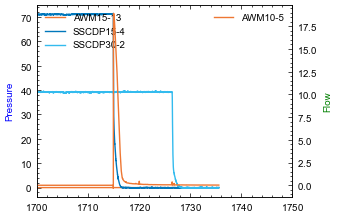

In [56]:
df = data[0][0]
time_column = 'Time'
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Flow', color='green')
ax1.set_ylabel('Pressure', color='blue')
V = []

# Iterate through each column (except the time column)
for column in df.columns:
    if column != time_column:
        if 'AWM10-5' in column:
            # Plot on right y-axis
            ax2.plot(df[time_column], df[column], label=column)
            V.append(np.trapz(df[column], df[time_column]))
            
        elif 'MPX' in column:
            continue 
        else:
            # Plot on left y-axis
            ax1.plot(df[time_column], df[column]/1000, label=column)
    print(column)

#ax1.set_xlim(1500,1750)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlim(1700,1750)
print(V)

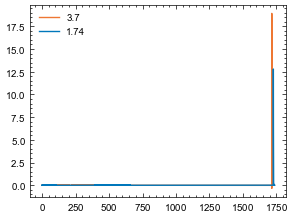

In [57]:
for i, df in enumerate(data[0]):
    t = data[0][i]['Time'] 

    if 'AWM10-5' in df.columns:
        Q1 = df['AWM10-5'] 
        label = "3.7"
        plt.plot(t, Q1, label=label)
        
    if 'AWM15-13' in df.columns:
        Q2 = df['AWM15-13'] 
        label = "1.74"
        plt.plot(t, Q2, label=label)

    if 'SSCDP15-4' in df.columns:
        P1 = df['SSCDP15-4'] 
        label = "3.7"
        #plt.plot(t, P1, label=label)

    if 'SSCDP30-2' in df.columns:
        P2 = df['SSCDP30-2'] 
        label = "1.74"
        #plt.plot(t, P2, label=label)
    break 

plt.legend()
#plt.xlim(1700,1750)


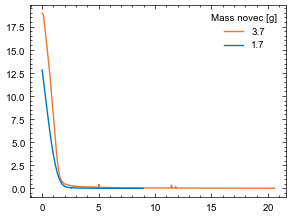

In [58]:

# Find the index of the maximum value in Q1 and Q2
index_max_Q1 = Q1.argmax()
index_max_Q2 = Q2.argmax()

# Use these indices to slice the data for plotting
Q1_from_max = Q1[index_max_Q1:]
P1_from_max = P1[index_max_Q1:]
t_Q1_from_max = t[index_max_Q1:] -t[index_max_Q1] # Assuming 't' is your time or x-axis data

Q2_from_max = Q2[index_max_Q2:]
P2_from_max = P2[index_max_Q2:]
t_Q2_from_max = t[index_max_Q2:]-t[index_max_Q2]   # Assuming 't' is the same for Q2


# Plotting
plt.plot(t_Q1_from_max, Q1_from_max, label='3.7')
plt.plot(t_Q2_from_max, Q2_from_max, label='1.7')

plt.legend(title="Mass novec [g]", title_fontsize='7')
plt.show()


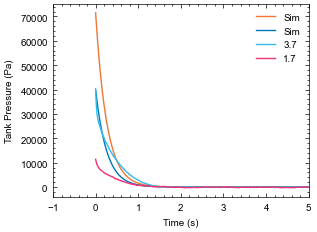

In [59]:


# Define P_amb and R_valve (values assumed for example)
P_amb = 1e5  # Ambient pressure in Pascals
R_valve = 500   # Resistance of the valve

# Given data
P1_max = max(P1)+P_amb  # Assuming P1 is defined
P2_max = max(P2)+P_amb # Assuming P2 is defined
V_tank = 0.525e-3



# System of ODEs
def dPdt(P, t):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Time array for simulation
t_sim = np.linspace(0, 5, 200)

# Run simulation for each starting point
P_tank_P1_max = odeint(dPdt, [P1_max], t_sim)
P_tank_P2_max = odeint(dPdt, [P2_max], t_sim)

# Plotting
plt.plot(t_sim, P_tank_P1_max-P_amb, label='Sim')
plt.plot(t_sim, P_tank_P2_max-P_amb, label='Sim')
plt.plot(t_Q1_from_max, P1_from_max, label='3.7')
plt.plot(t_Q2_from_max, P2_from_max, label='1.7')

plt.xlabel('Time (s)')
plt.ylabel('Tank Pressure (Pa)')
plt.legend()
plt.xlim(-1,5)
plt.show()


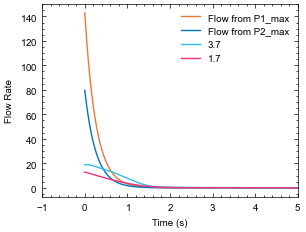

In [60]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define P_amb and R_valve
P_amb = 1e5  # Ambient pressure in Pascals
R_valve = 500   # Resistance of the valve

# Given data
P1_max = max(P1) + P_amb  # Assuming P1 is defined
P2_max = max(P2) + P_amb  # Assuming P2 is defined
V_tank = 0.525e-3

# System of ODEs
def dPdt(P, t):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Time array for simulation
t_sim = np.linspace(0, 20, 1000)

# Run simulation for each starting point
P_tank_P1_max = odeint(dPdt, [P1_max], t_sim)[:, 0]
P_tank_P2_max = odeint(dPdt, [P2_max], t_sim)[:, 0]

# Calculate the flow for each time step
Q_P1_max = (P_tank_P1_max - P_amb) / R_valve
Q_P2_max = (P_tank_P2_max - P_amb) / R_valve

# Plotting
plt.plot(t_sim, Q_P1_max, label='Flow from P1_max')
plt.plot(t_sim, Q_P2_max, label='Flow from P2_max')
plt.plot(t_Q1_from_max, Q1_from_max, label='3.7')
plt.plot(t_Q2_from_max, Q2_from_max, label='1.7')
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate')
plt.legend()
plt.xlim(-1, 5)
plt.show()


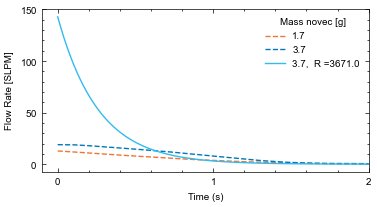

In [61]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define P_amb and initial guess for R_valve
P_amb = 1e5  # Ambient pressure in Pascals
R_valve_initial_guess = 1000  # Initial guess for R_valve

# Given data
P1_max = max(P1) + P_amb  # Assuming P1 is defined

# V_tank value
V_tank = 0.525e-3

# System of ODEs with R_valve as a parameter
def dPdt(P, t, R_valve):
    P_tank = P[0]
    Q_tank_to_amb = (P_tank - P_amb) / R_valve
    dP_tank_dt = -Q_tank_to_amb / V_tank
    return [dP_tank_dt]

# Function to integrate the ODEs and calculate flow rate
def model(t, R_valve):
    P_tank = odeint(dPdt, [P1_max], t, args=(R_valve,))[:, 0]
    Q = (P_tank - P_amb) / R_valve
    return Q

# Fit the model to the experimental data
popt, _ = curve_fit(model, t_Q1_from_max, P1_from_max/1000, p0=[R_valve_initial_guess])

# Extract the optimized R_valve
R_valve_optimized = popt[0]

# Run simulation with optimized R_valve
Q_P1_max_optimized = model(t_sim, R_valve_optimized)

# Plotting
cm = 1/2.54
w= 10.7*cm
plt.figure(figsize=(w,0.5*w))

plt.plot(t_Q2_from_max, Q2_from_max, linestyle='--',label='1.7')
plt.plot(t_Q1_from_max, Q1_from_max, linestyle='--',label = '3.7')
#plt.plot(t_sim, Q_P1_max_optimized, label=f'Simulated initial guess  R = {R_valve_initial_guess} ')
plt.plot(t_sim, Q_P1_max, label=f'3.7,  R ={ round(R_valve_optimized,0)}')

plt.xlabel('Time (s)')
plt.xlim(-0.1,2)
plt.ylabel('Flow Rate [SLPM]')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.legend(title="Mass novec [g]", title_fontsize='7')

#plt.savefig('figures/discharge_data.svg')




In [71]:
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Pressure_flow_plastic_bottle"

Foldernames = ["/Data"]

data1 = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 6
Loading... Folder 1 of 1, Sample 2 of 6
Loading... Folder 1 of 1, Sample 3 of 6
Loading... Folder 1 of 1, Sample 4 of 6
Loading... Folder 1 of 1, Sample 5 of 6
Loading... Folder 1 of 1, Sample 6 of 6


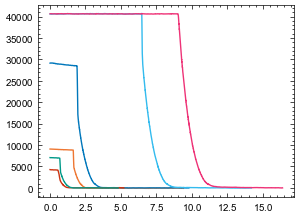

In [72]:
for i in range(len(data1[0])):
    cutoff = 14.8
    sample_rate = data1[1]['Samplerate'][i]
    
# Find index to cutoff
    index_cutoff = int(cutoff * sample_rate)
    
    # Get new zero value for Time column
    new_zero = data1[0][i].iloc[index_cutoff]['Time']
    
    # Subtract new_zero from all values in Time column
    data1[0][i]['Time'] = data1[0][i]['Time'] - new_zero
    
    # Keep rows after cutoff
    data1[0][i] = data1[0][i].iloc[index_cutoff:]
    
    # Reset index
    data1[0][i].reset_index(drop=True, inplace=True)

    plt.plot(data1[0][i]['Time'],data1[0][i]['SSCDP05-3'],label=data1[1]['Samplename'][i])

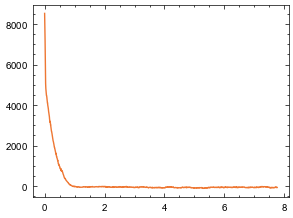

In [73]:
treshold=70
difference=np.diff(data1[0][0]['SSCDP05-3'])

indices = np.where(difference < -treshold)

sharp_decrease= data1[0][0]['SSCDP05-3'][indices[0]]
plt.plot(data1[0][0]['Time'][:-indices[0][0]],data1[0][0]['SSCDP05-3'][indices[0][0]:])

['10', '30', '50', '80', '5', '8']
2169
2204
6983
9119


Text(0.5, 0, 'Time [s]')

<Figure size 421.26x421.26 with 0 Axes>

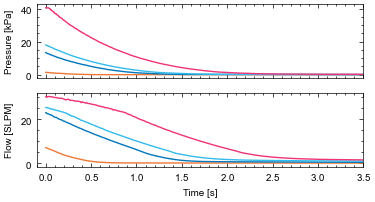

In [78]:
cm = 1/2.54
w = 10.7*cm
# Plot the results
plt.figure(figsize=(w, w))
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(w,w/2))
indices = [] 
labels = data1[1]['Samplename']

numeric_labels = [re.findall(r'\d+', label)[0] for label in labels]
print(numeric_labels)

for i in range(len(data1[0])):
    treshold=100
    difference=np.diff(data1[0][i]['SSCDP05-3'])
    indices.append(np.argmax(difference)) 
    print(indices[-1])
    offset = 110
    ax1.plot(data1[0][i]['Time'][:-(indices[i]-offset)],data1[0][i]['SSCDP05-3'][(indices[i]-offset):]/1000,label=numeric_labels[i])
    ax2.plot(data1[0][i]['Time'][:-(indices[i]-offset)],data1[0][i]['AWM20-12'][(indices[i]-offset):],label=numeric_labels[i])
    #plt.plot(data[0][i]['Time'],data[0][i]['SSCDP05-3'],label = data[1]['Samplename'][i])
    if i==3:
        break

ax2.set_ylabel('Flow [SLPM]')
ax1.set_ylabel('Pressure [kPa]')
plt.xlim(-0.1,3.5)
#ax1.legend(title='P setpoint [kPa]', loc='right', title_fontsize=7, ncol=2)
ax2.set_xlabel('Time [s]')

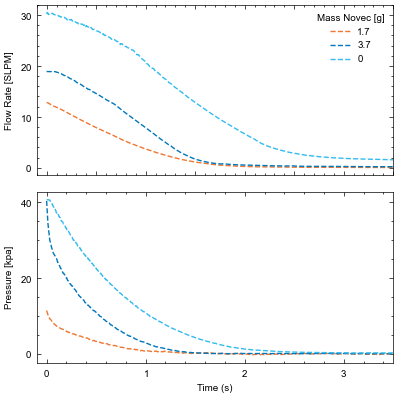

In [84]:
# Assuming t_Q1_from_max, t_Q2_from_max, Q1_from_max, Q2_from_max, P1_from_max, P2_from_max, and t_sim are defined
P1_sim_results = odeint(dPdt, [40e3+P_amb], t_sim, args=(R_valve_optimized,))[:, 0]

cm = 1/2.54
w = 10.7 * cm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(w, w))  # Create two subplots

# Plotting flow rate on the first subplot
ax1.plot(t_Q2_from_max, Q2_from_max, linestyle='--', label='1.7')
ax1.plot(t_Q1_from_max, Q1_from_max, linestyle='--', label='3.7')
ax1.plot(data1[0][i]['Time'][:-(indices[i]-offset)],data1[0][i]['AWM20-12'][(indices[i]-offset):],label=0, linestyle='--')

#ax1.plot(t_sim, Q_P1_max, label=f'3.7 (simulated),  R ={round(R_valve_optimized, 0)}')
#ax1.set_xlabel('Time (s)')
ax1.set_xlim(-0.1, 3.5)
ax1.set_ylabel('Flow Rate [SLPM]')
ax1.locator_params(axis='y', nbins=4)
ax1.legend(title="Mass Novec [g]", title_fontsize='7')
ax1.set_xticklabels([])  

# Plotting pressure on the second subplot
ax2.plot(t_Q2_from_max, P2_from_max/1000, label='1.7 g Novec', linestyle='--')
ax2.plot(t_Q1_from_max, P1_from_max/1000, label='3.7 g Novec', linestyle='--')
#ax2.plot(t_sim, (P1_sim_results-P_amb)/1000, label='3.7 g Novec Simulated')
ax2.plot(data1[0][i]['Time'][:-(indices[i]-offset)],data1[0][i]['SSCDP05-3'][(indices[i]-offset):]/1000,label=numeric_labels[i], linestyle='--')



ax2.set_xlabel('Time (s)')
ax2.set_xlim(-0.1, 3.5)
ax2.set_ylabel('Pressure [kpa]')
ax2.locator_params(axis='y', nbins=4)
ax2.locator_params(axis='x', nbins=4)
#ax2.legend(loc='upper right', title="Pressure", title_fontsize='7')

plt.tight_layout()  # Adjust layout
plt.savefig('figures/discharge_data.svg')
plt.show()
